In [44]:
import urllib2

In [45]:
import os

In [46]:
import pandas

In [47]:
def touch(fname):
    open(fname, 'a').close()
    os.utime(fname, None)

In [81]:
def read_stationlist():
    f = open('newstationList.txt', 'r')
    stations= f.readlines()
    stationsL = []
    for i in range(len(stations)):
        stationsL.append(stations[i].strip('\n'))
        
    return stationsL


In [82]:
stationsL=read_stationlist()
print stationsL

['armaghdata', 'ballypatrickdata', 'bradforddata', 'braemardata', 'cambornedata', 'cambridgedata', 'cardiffdata', 'chivenordata', 'cwmystwythdata', 'dunstaffnagedata', 'durhamdata', 'eastbournedata', 'eskdalemuirdata', 'heathrowdata', 'hurndata', 'lerwickdata', 'leucharsdata', 'lowestoftdata', 'nairndata', 'newtonriggdata', 'oxforddata', 'paisleydata', 'ringwaydata', 'rossonwyedata', 'shawburydata', 'sheffielddata', 'southamptondata', 'stornowaydata', 'suttonboningtondata', 'tireedata', 'valleydata', 'waddingtondata', 'wickairportdata', 'yeoviltondata']


In [56]:
def station_import (st):   
    req=urllib2.Request('http://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/'+st+'.txt')
    f = urllib2.urlopen(req)
    fn=st+'.txt'
    touch(fn)
    local_file = open(fn,"w")
    local_file.write(f.read())
    local_file.close()
    

In [79]:
station_import(stationsL[0])

In [140]:
def remove_star(value):
    if value[-1] == '*':
        value=value[0:-1]   
    elif value[-1] == '#':
        value=value[0:-1] 
    else:
        value=value[0:1]
    return value

In [141]:
for st in stationsL:
    fn=st+'.txt'
    print fn
    f2= pandas.read_csv(fn,skiprows=7,delimiter='\s+',skip_footer=7,names=['Year','Month','TMax','TMin','AF','Rain','Sun'])
    f2['Sun'] = f2['Sun'].apply(remove_star)
    f2['TMax'] = f2['TMax'].apply(remove_star)
    f2['TMin'] = f2['TMin'].apply(remove_star)
    f2['AF'] = f2['AF'].apply(remove_star)
    f2['Rain'] = f2['Rain'].apply(remove_star)
        f2['Sun'] = f2['Sun'].apply(remove_star)
    f2['TMax'] = f2['TMax'].apply(remove_star)
    f2['TMin'] = f2['TMin'].apply(remove_star)
    f2['AF'] = f2['AF'].apply(remove_star)
    f2['Rain'] = f2['Rain'].apply(remove_star)
    f2 = f2.convert_objects(convert_numeric=True)
    f2 = f2.replace(to_replace='---',value='')
    

IndentationError: unexpected indent (<ipython-input-141-b8108dd00241>, line 10)

In [125]:
    fn='cambornedata.txt'
    f2= pandas.read_csv(fn,skiprows=7,delimiter='\s+',skip_footer=7,names=['Year','Month','TMax','TMin','AF','Rain','Sun'])
    f2['Sun'] = f2['Sun'].apply(remove_star)

    f2 = f2.convert_objects(convert_numeric=True)
    f2 = f2.replace(to_replace='---',value='')

<function matplotlib.pyplot.show>

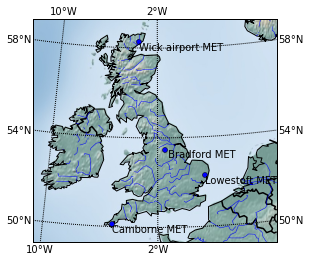

In [143]:

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

m = Basemap(width=1200000,height=1100000,
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=45.,lat_2=60,lat_0=54.32,lon_0=-2.2)
# setup lambert conformal basemap.
# lat_1 is first standard parallel.
# lat_2 is second standard parallel (defaults to lat_1).
# lon_0,lat_0 is central point.
# rsphere=(6378137.00,6356752.3142) specifies WGS4 ellipsoid
# area_thresh=1000 means don't p
m.drawcoastlines()
m.drawcountries(linewidth=1.5)
m.shadedrelief()
m.drawrivers(color="blue")
m.drawparallels(np.arange(50,59,4),labels=[1,1,1,1])
m.drawmeridians(np.arange(-10,6, 8),labels=[1,1,1,1])

lon=[-1.4534,-3.53, -5.17, 1.45]
lat=[53.4737,58.26, 50.12, 52.28]
x,y=m(lon,lat)
point_shape=['bo','bo','bo','bo']
labels=[' Bradford MET','Wick airport MET', 'Camborne MET','Lowestoft MET' ]

for label, xpt, ypt, point in zip(labels, x, y, point_shape):
    m.plot(xpt, ypt, point, markersize=5)
    plt.text(xpt,ypt-40000,label)
    
plt.show